<a href="https://colab.research.google.com/github/TangAikY/BootCamp/blob/main/_dsuncut_Telco_Churn_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/theleadio/datascience_demo/master/telco_customer_churn_dataset.csv')

In [ ]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6581,2453-SAFNS,Female,1,No,No,54,Yes,Yes,DSL,No,Yes,No,Yes,Yes,No,One year,No,Mailed check,72.10,3886.05,No
688,0946-FKYTX,Male,0,No,No,52,No,No phone service,DSL,No,Yes,No,No,No,No,One year,No,Mailed check,30.10,1623.4,No
1154,8292-ITGYJ,Female,0,Yes,Yes,45,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),24.65,1138.8,No
6599,0023-XUOPT,Female,0,Yes,No,13,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,No,Electronic check,94.10,1215.6,Yes
6660,1447-GIQMR,Male,0,Yes,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.15,69.15,Yes
4748,3125-RAHBV,Male,0,No,No,22,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.30,467.15,No
3943,8720-RQSBJ,Male,1,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,44.00,44,No
6405,5298-GSTLM,Female,1,No,No,60,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,One year,Yes,Bank transfer (automatic),101.40,6176.6,No
6890,7470-DYNOE,Male,0,No,No,53,Yes,No,DSL,No,No,Yes,No,No,Yes,One year,Yes,Electronic check,61.10,3357.9,No
1390,8039-ACLPL,Female,0,Yes,Yes,72,Yes,No,DSL,Yes,Yes,Yes,No,No,Yes,Two year,No,Credit card (automatic),68.75,4888.2,No


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors="coerce")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
binary_columns = ["Partner", "PhoneService", "Dependents", "PaperlessBilling", "Churn"]

for column in binary_columns:
  df[column] = df[column].map({"No": 0, "Yes": 1})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [ ]:
df['MultipleLines'] = df['MultipleLines'].map({"No": 0, "Yes": 1, "No phone service":0})

In [ ]:
df['MultipleLines'].unique()

array([0, 1])

In [ ]:
df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
df['OnlineSecurity'] = df['OnlineSecurity'].map({"No": 0, "Yes": 1, "No internet service":0})

In [ ]:
df['OnlineSecurity'].unique()

array([0, 1])

In [ ]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [ ]:
df = pd.get_dummies(data=df, columns=['InternetService'])

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,Female,0,1,0,1,0,0,0,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,0
1,5575-GNVDE,Male,0,0,0,34,1,0,1,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0,1,0,0
2,3668-QPYBK,Male,0,0,0,2,1,0,1,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0
3,7795-CFOCW,Male,0,0,0,45,0,0,1,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0
4,9237-HQITU,Female,0,0,0,2,1,0,0,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,0,1,0


In [ ]:
df['gender'] = df['gender'].map({"Female": 0, "Male": 1})

In [ ]:
internet_columns = ['DeviceProtection', 'TechSupport', 'OnlineBackup','StreamingTV', 'StreamingMovies']

for column in internet_columns:
  df[column] = df[column].map({"No": 0, "Yes": 1, "No internet service":0})

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0,1,0,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,0,1,0


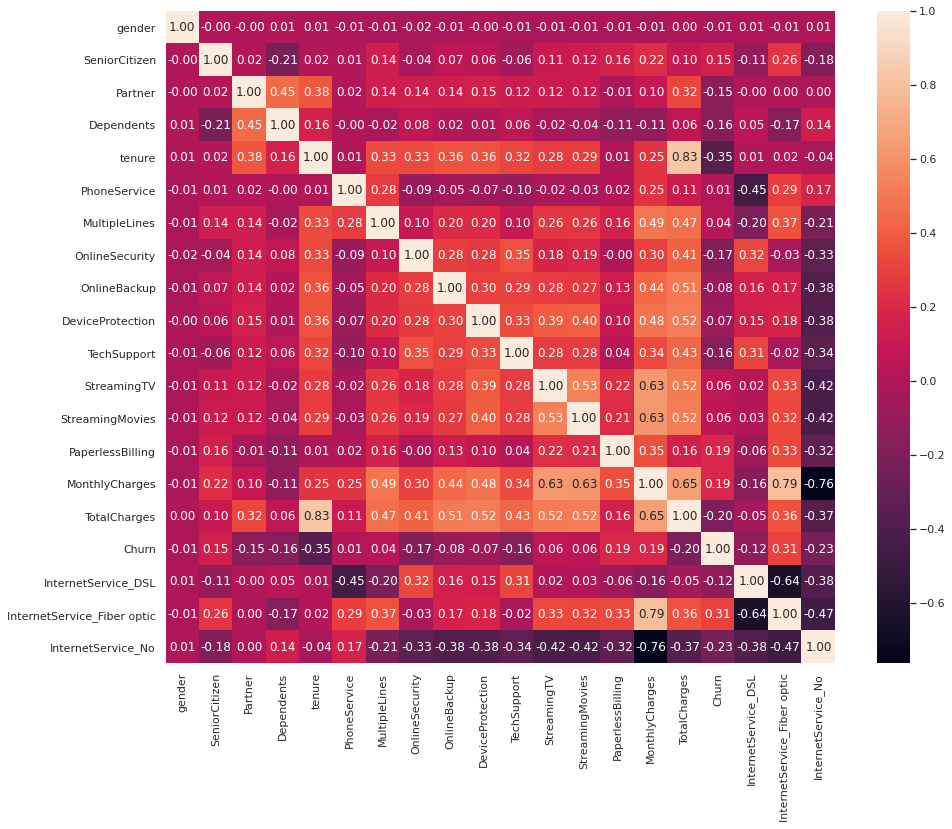

In [ ]:
sns.set(rc={'figure.figsize':(15,12)})

corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f")

In [ ]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2283.300441,0.265370,0.343746,0.439585,0.216669
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.771362,0.441561,0.474991,0.496372,0.412004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df = df.dropna()

In [ ]:
df.describe()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2283.300441,0.265785,0.343572,0.440273,0.216155
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,2266.771362,0.441782,0.474934,0.496455,0.411650
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from matplotlib import pyplot as plt

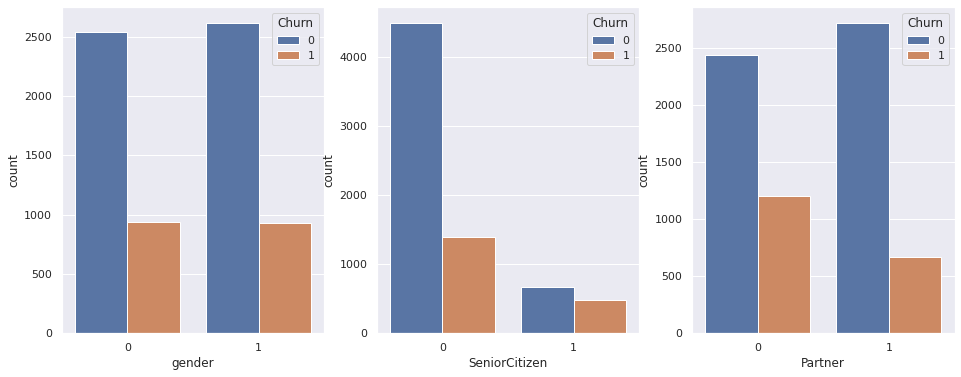

In [ ]:
main, subplots = plt.subplots(1, 3, figsize=(16,6))
sns.countplot(data=df, x="gender", hue="Churn", ax=subplots[0])
sns.countplot(data=df, x="SeniorCitizen", hue="Churn", ax=subplots[1])
sns.countplot(data=df, x="Partner", hue="Churn", ax=subplots[2])

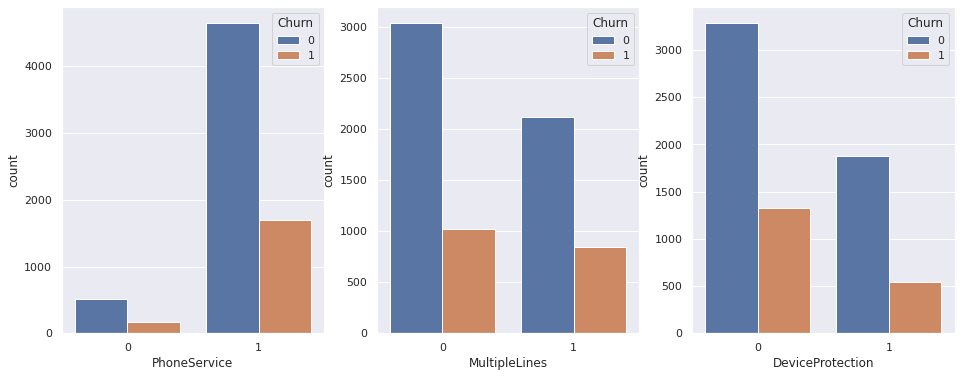

In [ ]:
main, subplots = plt.subplots(1, 3, figsize=(16,6))
sns.countplot(data=df, x="PhoneService", hue="Churn", ax=subplots[0])
sns.countplot(data=df, x="MultipleLines", hue="Churn", ax=subplots[1])
sns.countplot(data=df, x="DeviceProtection", hue="Churn", ax=subplots[2])

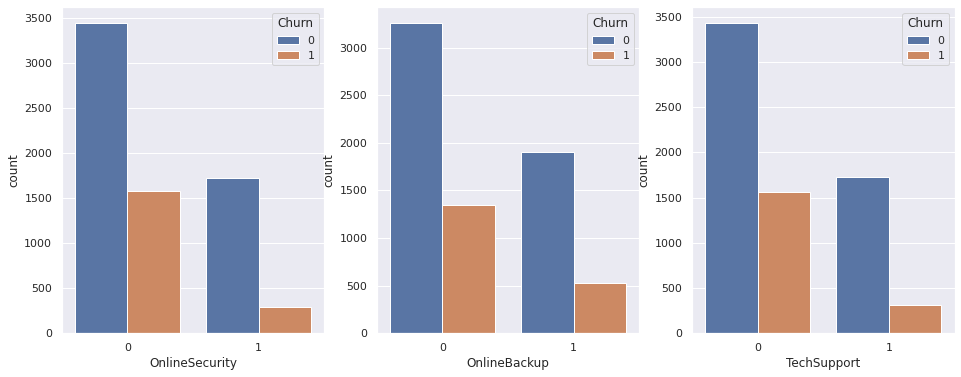

In [ ]:
main, subplots = plt.subplots(1, 3, figsize=(16,6))
sns.countplot(data=df, x="OnlineSecurity", hue="Churn", ax=subplots[0])
sns.countplot(data=df, x="OnlineBackup", hue="Churn", ax=subplots[1])
sns.countplot(data=df, x="TechSupport", hue="Churn", ax=subplots[2])

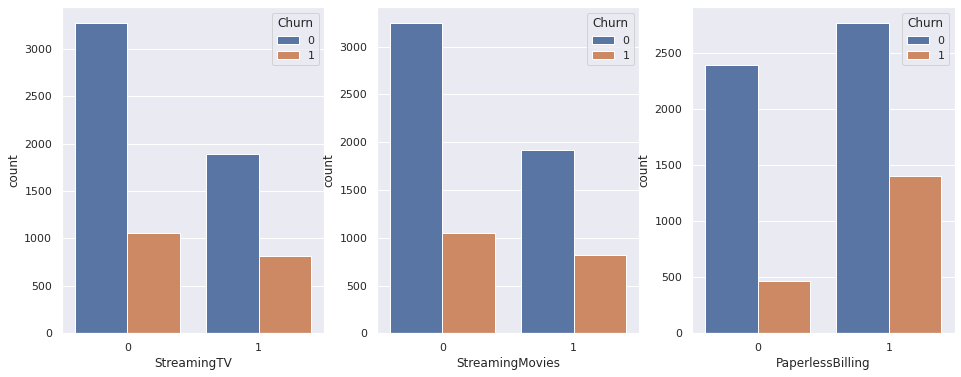

In [ ]:
main, subplots = plt.subplots(1, 3, figsize=(16,6))
sns.countplot(data=df, x="StreamingTV", hue="Churn", ax=subplots[0])
sns.countplot(data=df, x="StreamingMovies", hue="Churn", ax=subplots[1])
sns.countplot(data=df, x="PaperlessBilling", hue="Churn", ax=subplots[2])

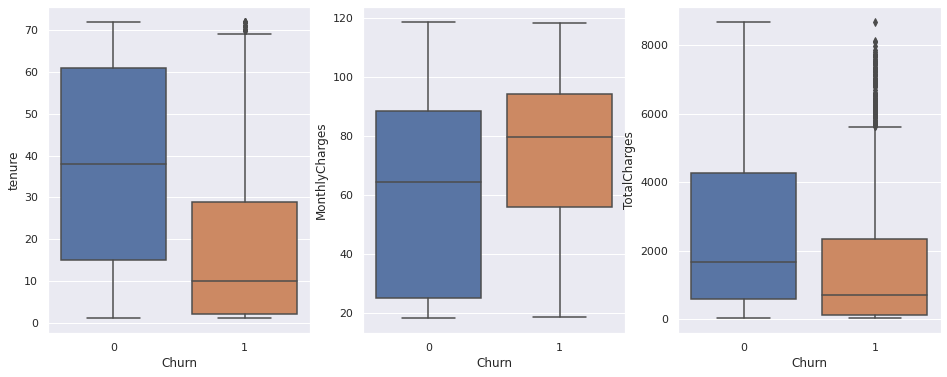

In [ ]:
main, subplots = plt.subplots(1, 3, figsize=(16,6))
sns.boxplot(data=df, y="tenure", x="Churn", ax=subplots[0])
sns.boxplot(data=df, y="MonthlyCharges", x="Churn", ax=subplots[1])
sns.boxplot(data=df, y="TotalCharges", x="Churn", ax=subplots[2])

In [ ]:
columns = ['SeniorCitizen', 'Partner', 'PhoneService', 'DeviceProtection', 'OnlineSecurity', 
           'OnlineBackup', 'TechSupport', 'PaperlessBilling', 'tenure', 'MonthlyCharges', 'TotalCharges' ]

In [ ]:
train_data = df[columns]
train_labels = df['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.3, random_state=1)

In [ ]:
from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth = 3)
model.fit(train_data, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn import metrics
print ("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.795260663507109


In [ ]:
import graphviz
columns = list(train_data.columns)

dot_data = tree.export_graphviz(model, out_file=None, feature_names=columns, class_names=['No', 'Yes'] ,filled = True, rounded = True)

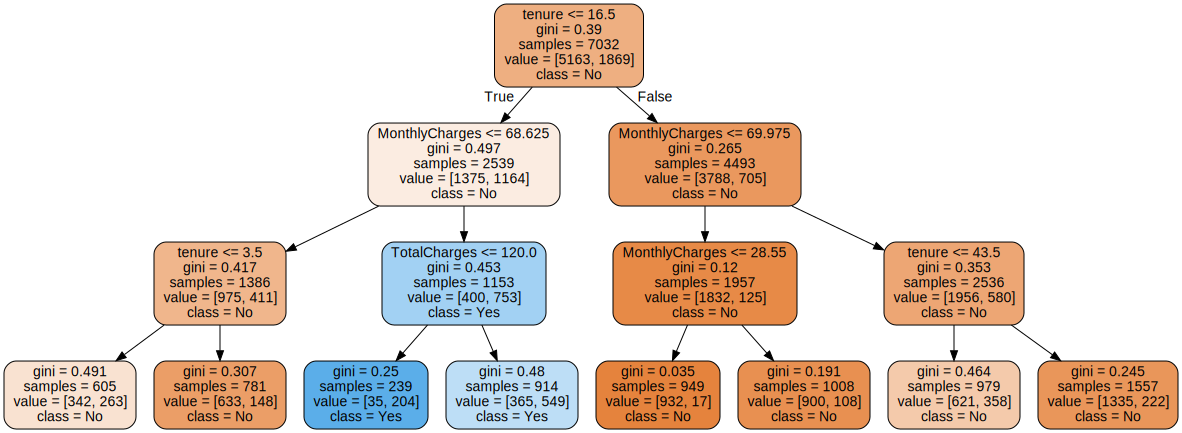

In [ ]:
graph = graphviz.Source(dot_data)
graph

In [ ]:
df_predict = train_data.iloc[0:0].copy()

In [ ]:
df_predict = df_predict.append({
    "SeniorCitizen": 0,
    "Partner":0,
    "PhoneService":1,
    "DeviceProtection": 1,
    "OnlineSecurity": 0,
    "OnlineBackup":0,
    "TechSupport":1,
    "PaperlessBilling":1,
    "tenure": 12,
    "MonthlyCharges":50,
    "TotalCharges":70
}, ignore_index=True)

In [ ]:
df_predict

,SeniorCitizen,Partner,PhoneService,DeviceProtection,OnlineSecurity,OnlineBackup,TechSupport,PaperlessBilling,tenure,MonthlyCharges,TotalCharges
0,0,0,1,1,0,0,1,1,12,50.0,70.0


In [ ]:
model.predict(df_predict)

array([0])